# Customer Clustering with K-Means

In [15]:
#1. Data Exploration:import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
data=pd.read_csv('Clustering.csv')
data


,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQ,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.40,0.166667,0.083333,2,1000.0,201.802084,12
1,C10002,3202.467416,0.00,0.00,0.000000,0.000000,0,7000.0,4103.032597,12
2,C10003,2495.148862,773.17,0.00,1.000000,0.000000,12,7500.0,622.066742,12
3,C10004,1666.670542,1499.00,0.00,0.083333,0.000000,1,7500.0,0.000000,12
4,C10005,817.714335,16.00,0.00,0.083333,0.000000,1,1200.0,678.334763,12
...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,291.12,291.12,1.000000,0.833333,6,1000.0,325.594462,6
8946,C19187,19.183215,300.00,300.00,1.000000,0.833333,6,1000.0,275.861322,6
8947,C19188,23.398673,144.40,144.40,0.833333,0.666667,5,1000.0,81.270775,6
8948,C19189,13.457564,0.00,0.00,0.000000,0.000000,0,500.0,52.549959,6


In [17]:
#2. Data Preprocessing
data.isna().sum()

CUST_ID                        0
BALANCE                        0
PURCHASES                      0
INSTALLMENTS_PURCHASES         0
PURCHASES_FREQ                 0
PURCHASES_INSTALLMENTS_FREQ    0
PURCHASES_TRX                  0
CREDIT_LIMIT                   1
PAYMENTS                       0
TENURE                         0
dtype: int64

In [18]:
data=data.fillna(method='bfill')
data.isna().sum()

CUST_ID                        0
BALANCE                        0
PURCHASES                      0
INSTALLMENTS_PURCHASES         0
PURCHASES_FREQ                 0
PURCHASES_INSTALLMENTS_FREQ    0
PURCHASES_TRX                  0
CREDIT_LIMIT                   0
PAYMENTS                       0
TENURE                         0
dtype: int64

In [ ]:
#Convert Attrition feature - String to number with
#Encoding techniques

In [20]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['CUST_ID']=en.fit_transform(data['CUST_ID'])

In [21]:
data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQ,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE
0,0,40.900749,95.40,95.4,0.166667,0.083333,2,1000.0,201.802084,12
1,1,3202.467416,0.00,0.0,0.000000,0.000000,0,7000.0,4103.032597,12
2,2,2495.148862,773.17,0.0,1.000000,0.000000,12,7500.0,622.066742,12
3,3,1666.670542,1499.00,0.0,0.083333,0.000000,1,7500.0,0.000000,12
4,4,817.714335,16.00,0.0,0.083333,0.000000,1,1200.0,678.334763,12


<Axes: xlabel='CUST_ID', ylabel='count'>

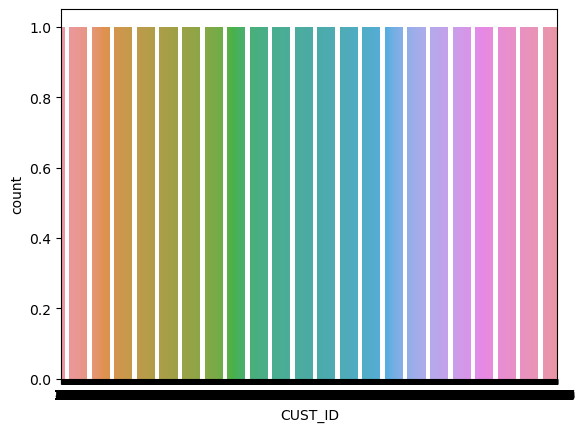

In [61]:
sns.countplot(data=data,x='CUST_ID')


In [26]:
data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQ,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE
0,0,40.900749,95.40,95.4,0.166667,0.083333,2,1000.0,201.802084,12
1,1,3202.467416,0.00,0.0,0.000000,0.000000,0,7000.0,4103.032597,12
2,2,2495.148862,773.17,0.0,1.000000,0.000000,12,7500.0,622.066742,12
3,3,1666.670542,1499.00,0.0,0.083333,0.000000,1,7500.0,0.000000,12
4,4,817.714335,16.00,0.0,0.083333,0.000000,1,1200.0,678.334763,12


In [28]:
#3 4 Build K-Means model
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=3)
clust.fit(data)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [29]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [30]:
#Performance measure
from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette Score:\t',silhouette_score(data,labels))

[0 1 1 ... 0 0 0] 8950
Silhouette Score:	 0.3916029682989192


In [31]:
clust.inertia_

186946115043.6727

In [32]:
clust.n_clusters


3

# Lbow curve to find optimum k value

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'Error')

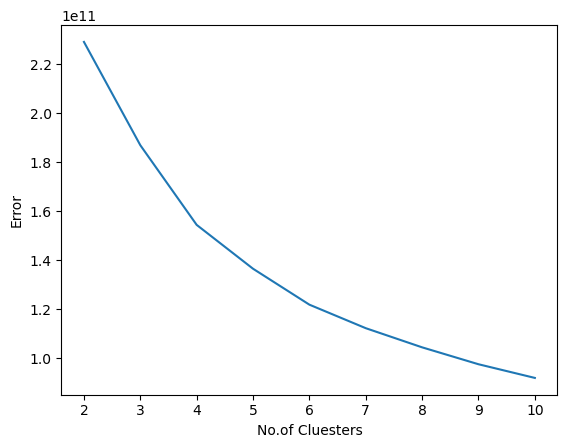

In [34]:
k=list(range(2,11))
y=[]
for i in k:
 km=KMeans(n_clusters=i,random_state=1,init='k-means++')
 km.fit(data)
 labels=km.labels_
 y.append(km.inertia_)
 
plt.plot(k,y)
plt.xlabel('No.of Cluesters')
plt.ylabel('Error')

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'size')

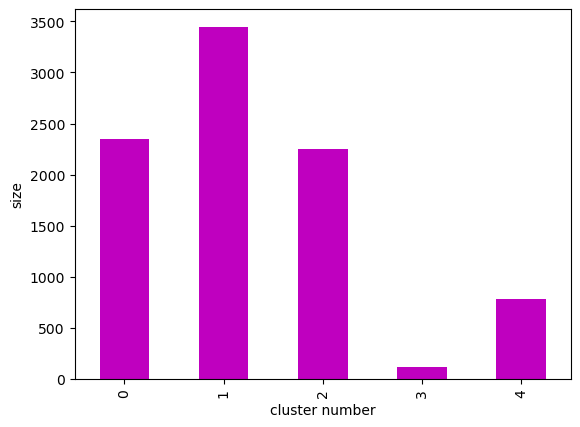

In [38]:
##Elbow point where slope of line is lower =5,6
cluster=KMeans(n_clusters=5,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.4328558272535592, 0.3927705497559362, 0.29370190254778555, 0.29307327758270496, 0.3017583504368282, 0.3095225172009664, 0.3104418280935513, 0.29652935652135054, 0.2918591978804432]


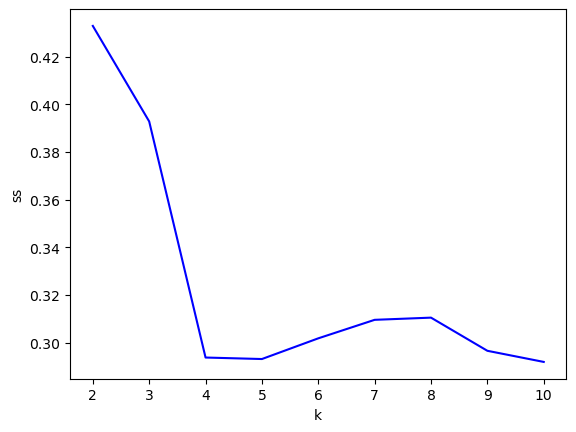

In [40]:
k=list(range(2,11))
ys=[]
for i in k:
 km=KMeans(n_clusters=i,random_state=2)
 km.fit(data)
 labels=km.labels_
 ys.append(silhouette_score(data,labels))
 
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

In [41]:
data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQ,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE,cluster
0,0,40.900749,95.40,95.4,0.166667,0.083333,2,1000.0,201.802084,12,0
1,1,3202.467416,0.00,0.0,0.000000,0.000000,0,7000.0,4103.032597,12,2
2,2,2495.148862,773.17,0.0,1.000000,0.000000,12,7500.0,622.066742,12,2
3,3,1666.670542,1499.00,0.0,0.083333,0.000000,1,7500.0,0.000000,12,2
4,4,817.714335,16.00,0.0,0.083333,0.000000,1,1200.0,678.334763,12,0


In [48]:
dff=data.drop(['TENURE','cluster'],axis=1)


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.4328558272535592, 0.3927705497559362, 0.29370190254778555, 0.29307327758270496, 0.3017583504368282, 0.3095225172009664, 0.3104418280935513, 0.29652935652135054, 0.2918591978804432]


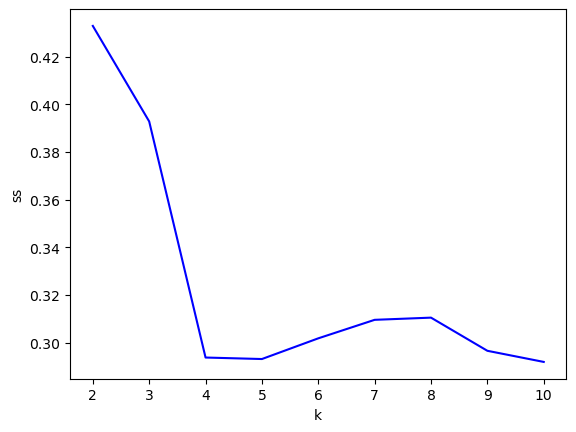

In [49]:
k=list(range(2,11))
ys=[]
for i in k:
 km=KMeans(n_clusters=i,random_state=2)
 km.fit(data)
 labels=km.labels_
 ys.append(silhouette_score(data,labels))
 
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'size')

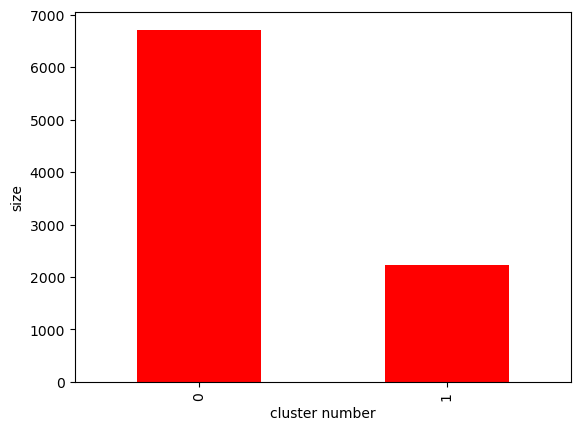

In [58]:
cluster=KMeans(n_clusters=2,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='red')
plt.xlabel('cluster number')
plt.ylabel('size')
